In [123]:
from body_matrix import load
from body_matrix import infer
from body_matrix import process
from body_matrix import draw

video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/TorchVision/INFER_VIDS/Nov30/00_01.mp4", 
    -90, 
    (frame_counts -3)
)

keypoints_model, keypoints_transform = load.keypoints_model("cpu")
boxes, keypoints = infer.detect_main_target(
    sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)

selected_kps = process.keypoints_filter(
    [
        'left_shoulder','right_shoulder',
        'left_hip','right_hip', 
        'left_wrist','right_wrist',
        'left_ankle', 'right_ankle'
    ], 
    keypoints
)

Found  2  person in the frame
Distances:  [127.79121398925781, 142.41326904296875]
Areas:  [186395.39307318442, 202324.73863340914]
FOCUSES:  [1458.5931790964353, 1420.6874120161092]
Select keypoint index 0


In [124]:
selected_kps

{'left_shoulder': [491.14105224609375, 844.2724609375],
 'right_shoulder': [371.53759765625, 844.2724609375],
 'left_wrist': [481.0540466308594, 906.1710815429688],
 'right_wrist': [309.5743103027344, 1012.6942749023438],
 'left_hip': [456.55694580078125, 1048.681884765625],
 'right_hip': [378.7426452636719, 1041.484375],
 'left_ankle': [378.7426452636719, 1374.0096435546875],
 'right_ankle': [426.29583740234375, 1302.034423828125]}

In [125]:
for index, value in enumerate(selected_kps.values()):
    print(index, value)

0 [491.14105224609375, 844.2724609375]
1 [371.53759765625, 844.2724609375]
2 [481.0540466308594, 906.1710815429688]
3 [309.5743103027344, 1012.6942749023438]
4 [456.55694580078125, 1048.681884765625]
5 [378.7426452636719, 1041.484375]
6 [378.7426452636719, 1374.0096435546875]
7 [426.29583740234375, 1302.034423828125]


[491.14105224609375, 844.2724609375]
[371.53759765625, 844.2724609375]
[481.0540466308594, 906.1710815429688]
[309.5743103027344, 1012.6942749023438]
[456.55694580078125, 1048.681884765625]
[378.7426452636719, 1041.484375]
[378.7426452636719, 1374.0096435546875]
[426.29583740234375, 1302.034423828125]


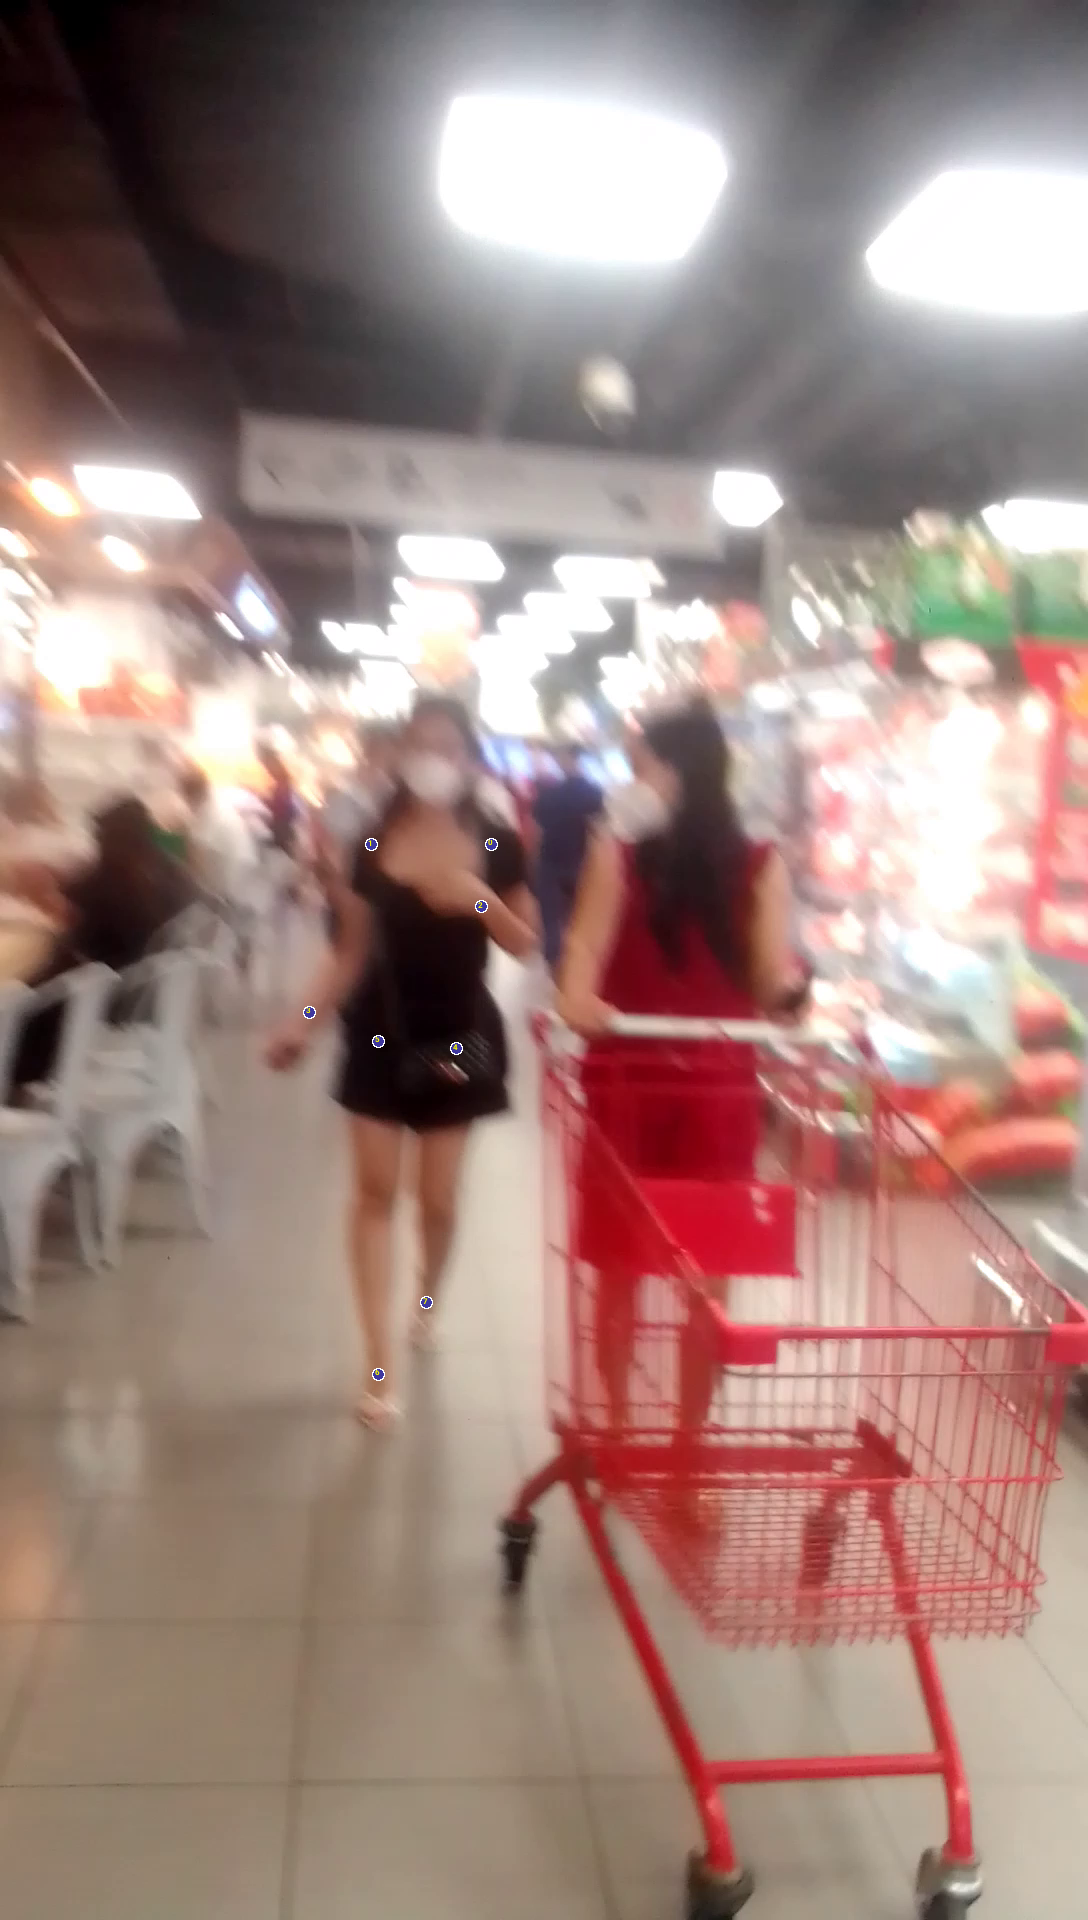

In [126]:
output = draw.keypoint_markers(
    coordinates=selected_kps,
    image=sample_frame, 
    label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf"
)

output

In [127]:
from body_matrix import measure 

middle_hip = measure.find_middle_point(
    selected_kps['left_hip'], 
    selected_kps['right_hip']
)

middle_shoulder = measure.find_middle_point(
    selected_kps['left_shoulder'], 
    selected_kps['right_shoulder']
)

middle_back = measure.find_middle_point(
    middle_shoulder, 
    middle_hip
)

middle_back

(424.4945602416992, 944.6777954101562)

In [128]:
rect_sample = draw.fixed_rectangle_label(
    image=output, 
    anchor_point=[output.width/2, 100], 
    label_text="Lottee Mart",
    label_size=30, 
    label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf", 
    label_color ="#FFFFFF",
    background_color = "#11114A"
)

In [129]:
selected_kps['left_shoulder']

[491.14105224609375, 844.2724609375]

In [130]:
selected_kps['right_hip']

[378.7426452636719, 1041.484375]

In [131]:
new_sample = draw.connecting_line(
    image=rect_sample, 
    pointA=selected_kps['right_shoulder'],
    pointB=selected_kps['left_hip'],
    line_color="white", 
    line_width=12
)

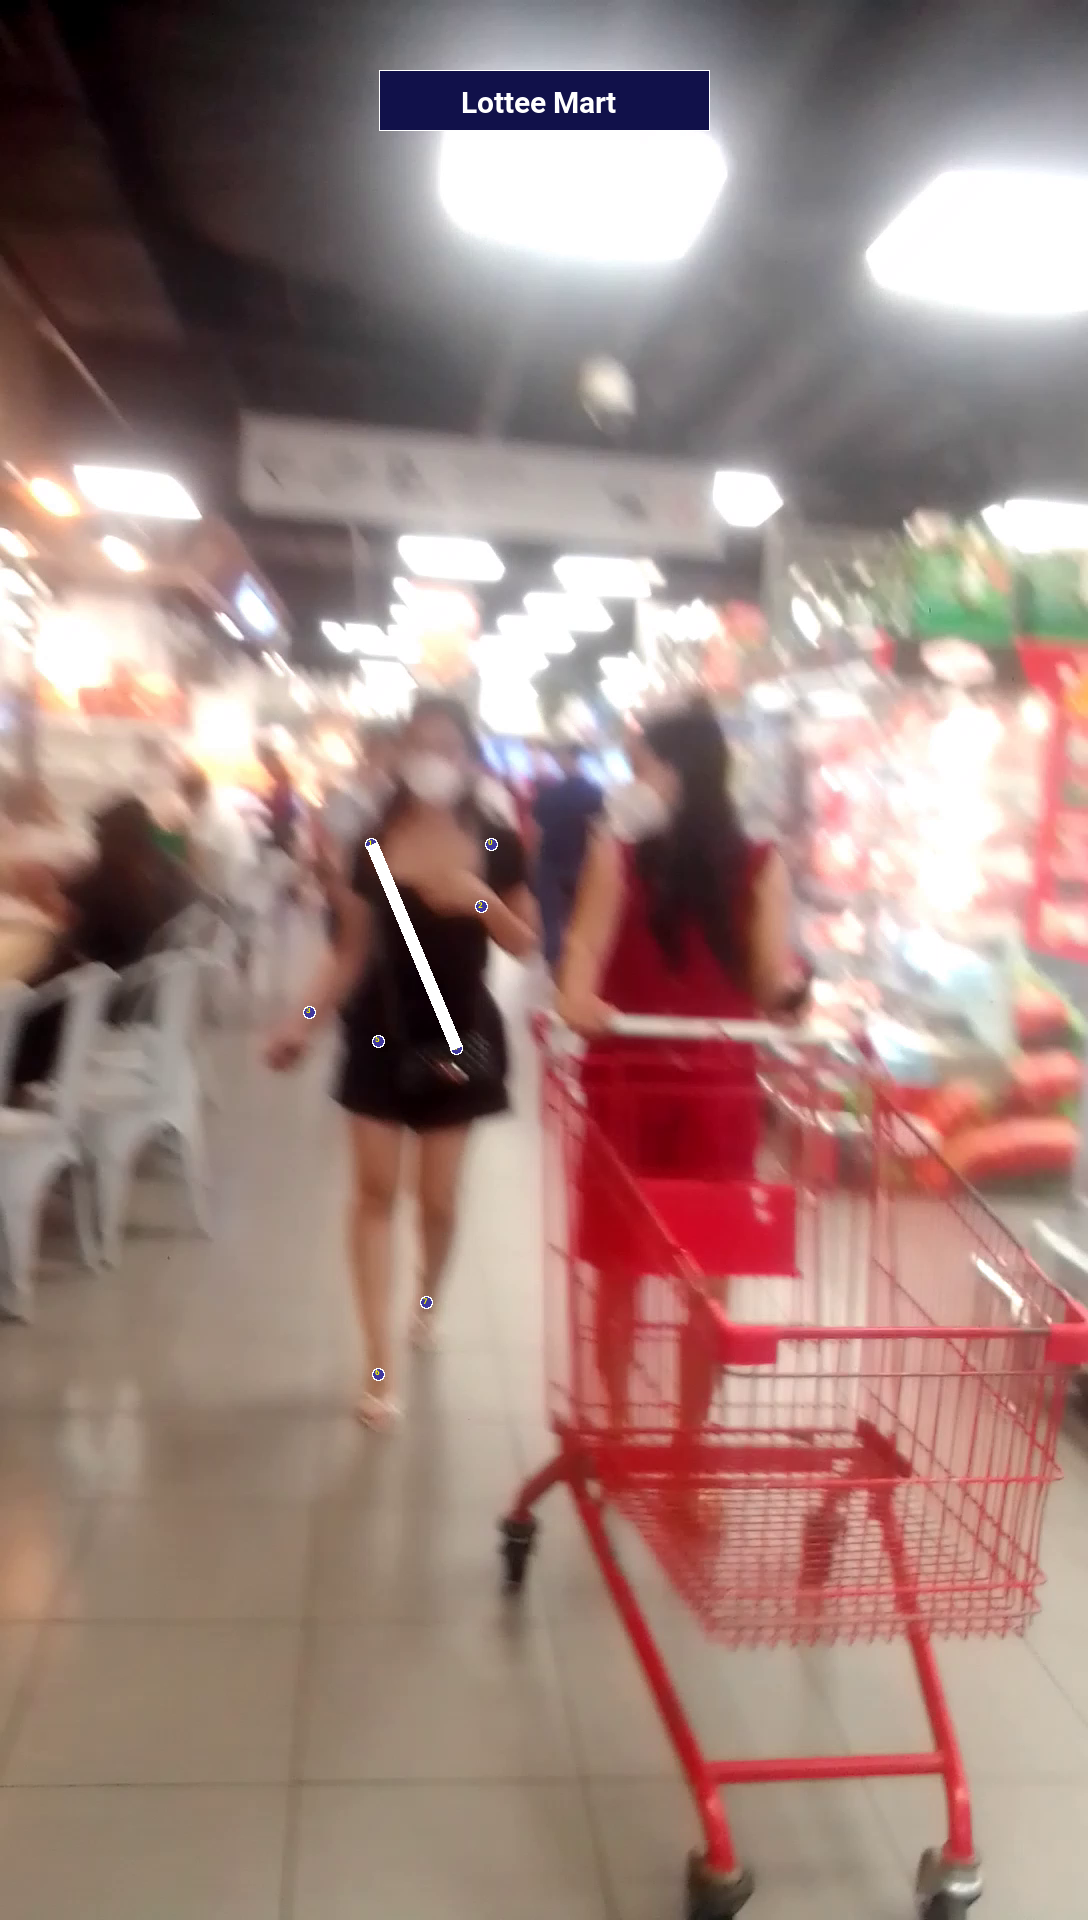

In [132]:
new_sample

In [134]:
label_circle =  measure.find_middle_point(
    selected_kps['right_shoulder'], 
    selected_kps['left_hip']
)

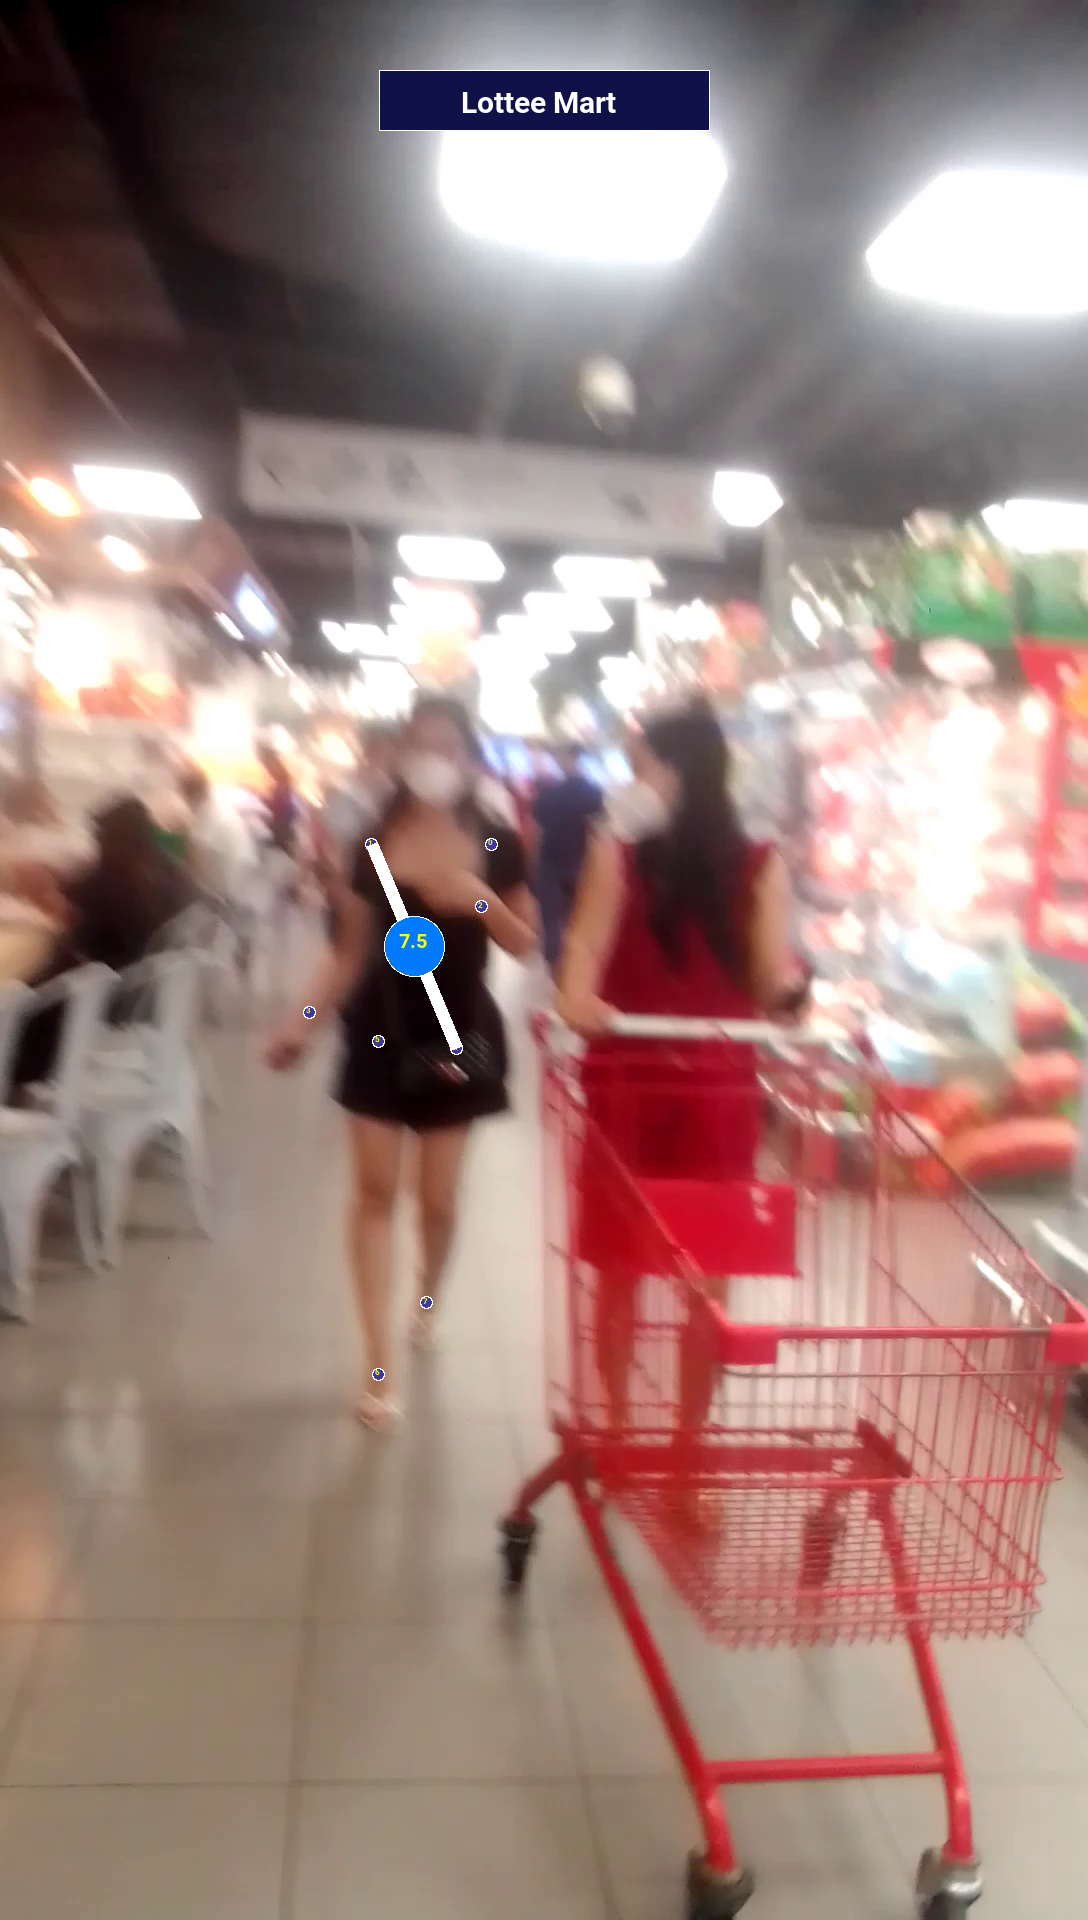

In [135]:
updated_sample = draw.circle_label(
    image=new_sample, 
    radius = 30,
    central_point=label_circle,
    background_color = "#007AFF", 
    label= "7.5", 
    label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf", 
    label_color ="#FAFF00"
)
updated_sample

In [136]:
selected_kps['right_shoulder']

[371.53759765625, 844.2724609375]

In [142]:
final_sample = rect_sample
for key, value in selected_kps.items():
    print(key, value)
    final_sample = draw.floating_rectangle_label(
        image=final_sample, 
        longitude_coordinate=middle_back[0],
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )    

left_shoulder [491.14105224609375, 844.2724609375]
right_shoulder [371.53759765625, 844.2724609375]
left_wrist [481.0540466308594, 906.1710815429688]
right_wrist [309.5743103027344, 1012.6942749023438]
left_hip [456.55694580078125, 1048.681884765625]
right_hip [378.7426452636719, 1041.484375]
left_ankle [378.7426452636719, 1374.0096435546875]
right_ankle [426.29583740234375, 1302.034423828125]


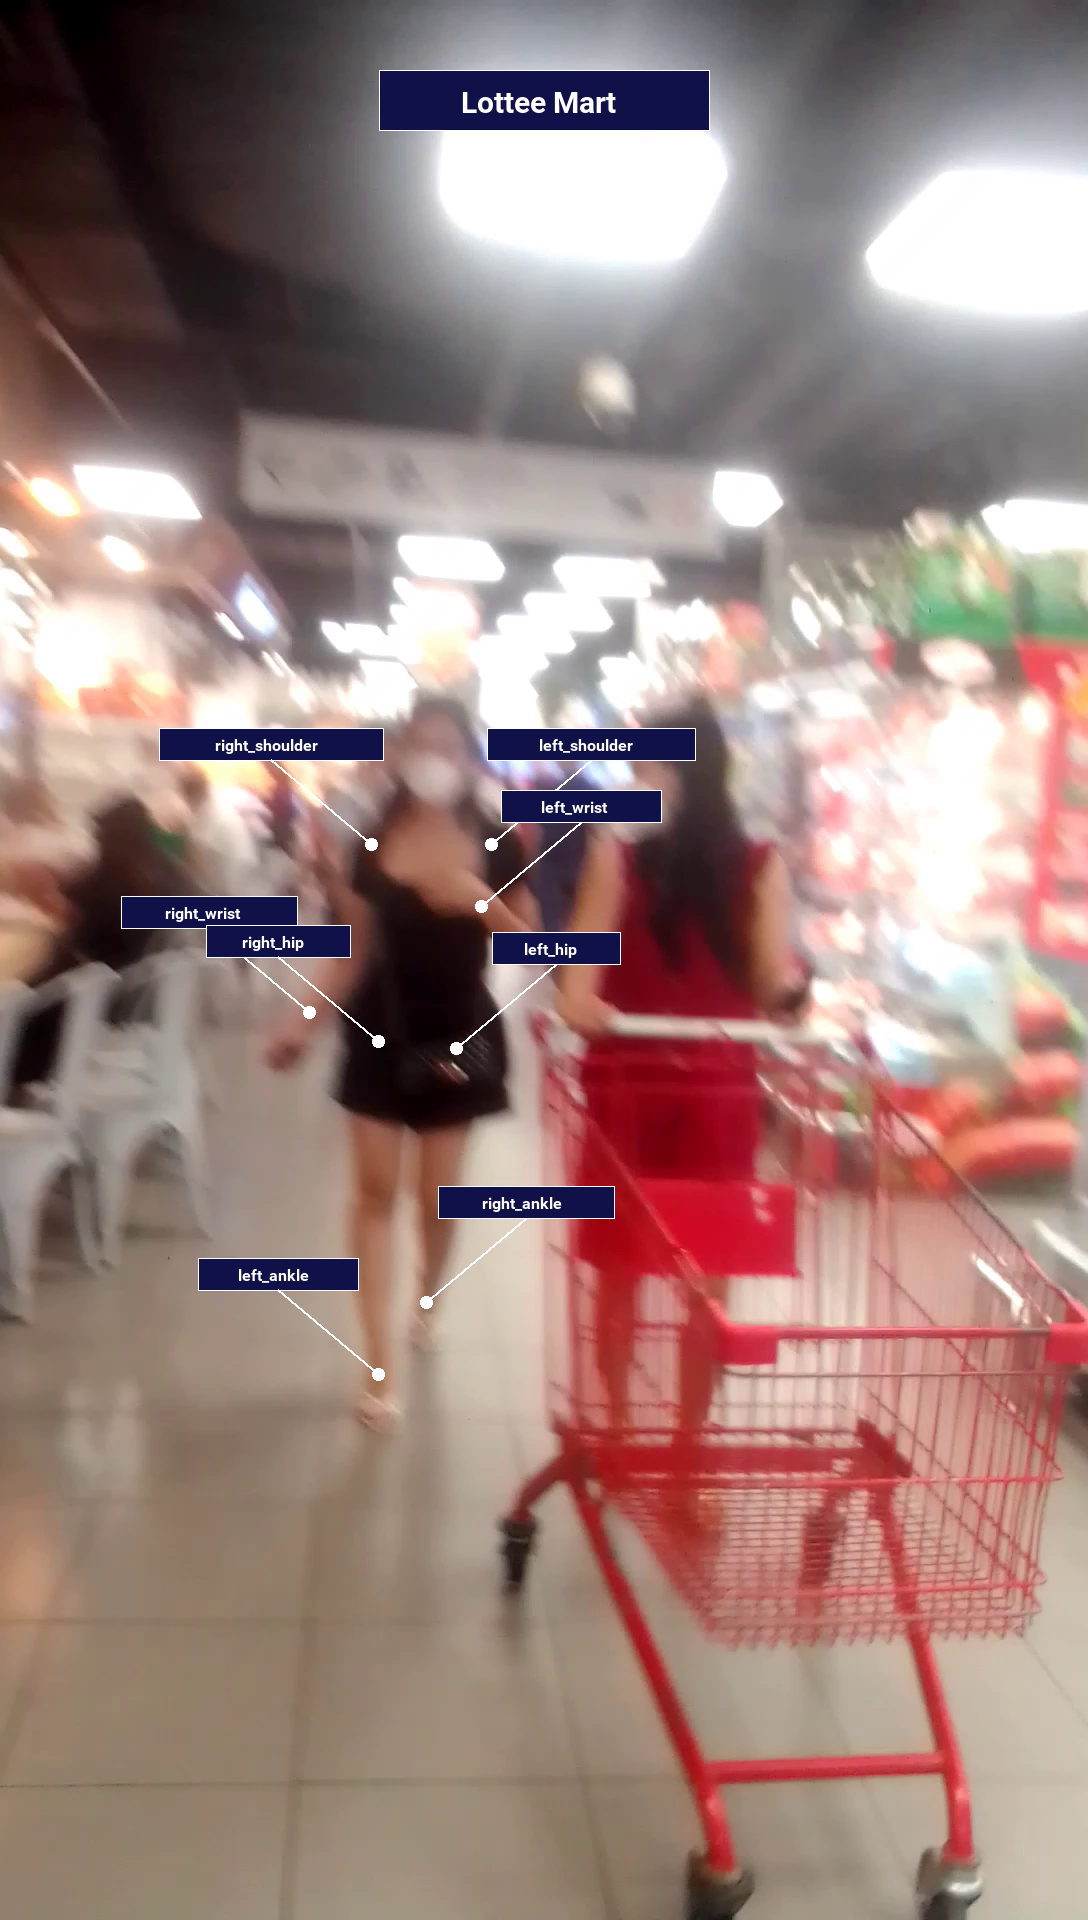

In [143]:
final_sample

In [144]:
final_sample.save("lottee_mart_sample.png")